### Introduction
This data consists of diagnostic information about some patients who have been tested for diabetes.
 Scroll to the right if necessary, and note that the final column in the dataset (Diabetic) contains the value 0 for patients who tested negative for diabetes,
 and 1 for patients who tested positive. This is the label that we will train our model to predict; 
 most of the other columns (Pregnancies,PlasmaGlucose,DiastolicBloodPressure, and so on) are the features we will use to predict the Diabetic label. I downloaded the dataset from kaggle

Let's separate the features from the labels - we'll call the features X and the label y:

In [1]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#load the dataset
df = pd.read_csv('diabetes.csv')
df.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [3]:
#check for null values
df.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [4]:
#check for duplication
df['PatientID'].duplicated().sum()

41

In [5]:
#get the shape of the data
df.shape

(10000, 10)

In [6]:
#define features and labels
feature = ['Pregnancies', 'PlasmaGlucose','DiastolicBloodPressure', 'TricepsThickness','SerumInsulin', 'BMI', 'DiabetesPedigree',
          'Age']
label = 'Diabetic'

In [7]:
#define X,y variable
X,y = df[feature].values,df[label].values

In [8]:
#lets print the features against the labels
for n in range(0,5):
    print('Patient', str(n+1),'\n Features:',list(X[n]), '\n Labels:',y[n])
    

Patient 1 
 Features: [0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
 Labels: 0
Patient 2 
 Features: [8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
 Labels: 0
Patient 3 
 Features: [7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
 Labels: 0
Patient 4 
 Features: [9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
 Labels: 1
Patient 5 
 Features: [1.0, 85.0, 59.0, 27.0, 35.0, 42.60453585, 0.549541871, 22.0] 
 Labels: 0


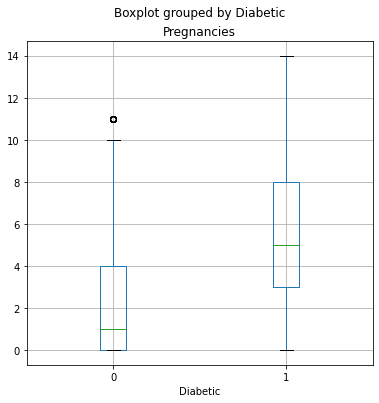

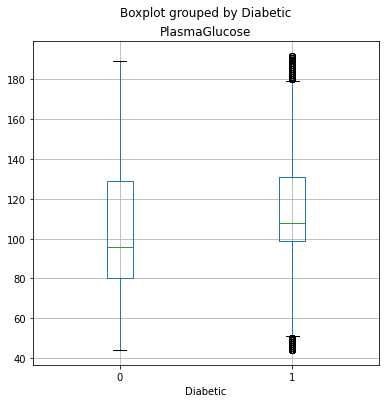

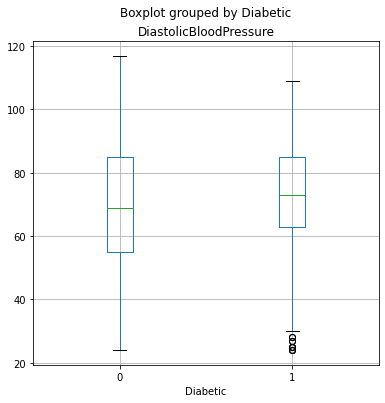

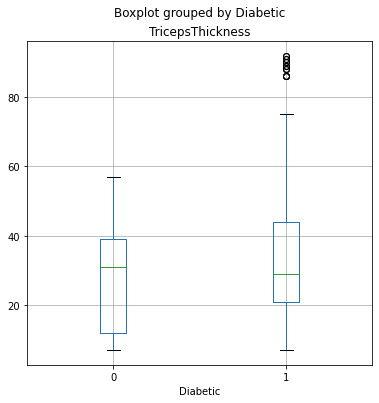

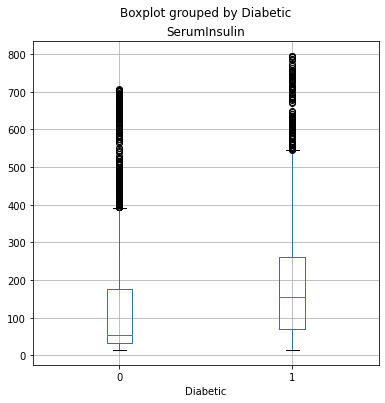

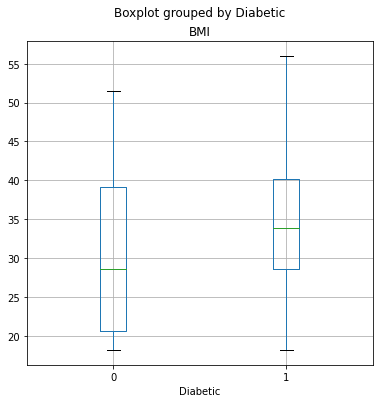

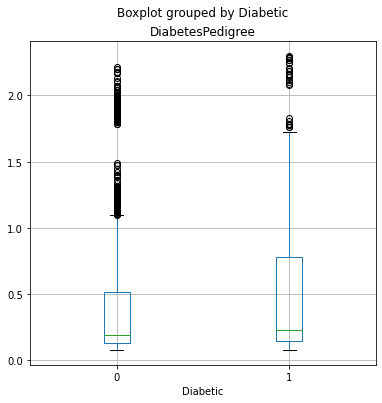

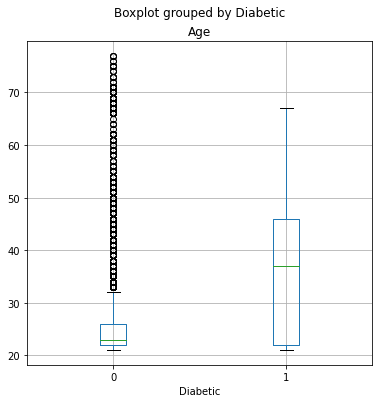

In [9]:
#Now let's compare the feature distributions for each label value.
features = ['Pregnancies', 'PlasmaGlucose','DiastolicBloodPressure', 'TricepsThickness','SerumInsulin', 'BMI', 'DiabetesPedigree',
          'Age']
for i in features:
    df.boxplot(column=i, by ='Diabetic', figsize=(6,6))
    plt.title(i)
    plt.show()

For some of the features, there's a noticeable difference in the distribution for each label value. In particular, 
Pregnancies and Age show markedly different distributions for diabetic patients than for non-diabetic patients. These features may help predict whether or not a patient is diabetic.

In [18]:
#split the data into training abd testing set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)

In [19]:
#print out the training & testing set shape
print('Training set',X_train.shape[0], '\nTesting set',X_test.shape[0])

Training set 7000 
Testing set 3000


In [20]:
#import LogisticRegressionLiberaries
from sklearn.linear_model import LogisticRegression
reg = 0.01

In [21]:
#define the model
model = LogisticRegression(C=1/reg, solver = 'liblinear').fit(X_train, y_train)

In [22]:
#predict the model
prediction = model.predict(X_test)

In [23]:
#print prediciton against actual
print('prediction:',y_test[:10])
print('Actual:    ',prediction[:10])

prediction: [0 1 0 1 1 1 0 0 0 0]
Actual:     [0 1 0 1 0 0 0 0 0 0]


In [24]:
#print accuracy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve,  roc_auc_score, precision_score, recall_score
ac = accuracy_score(prediction, y_test)
print(ac)

0.7953333333333333


In [26]:
#print classification report
cr = classification_report(prediction, y_test)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.82      0.86      2205
           1       0.59      0.72      0.65       795

    accuracy                           0.80      3000
   macro avg       0.74      0.77      0.75      3000
weighted avg       0.81      0.80      0.80      3000



In [27]:
#print confusion matrix
cm = confusion_matrix(prediction, y_test)
print(cm)

[[1814  391]
 [ 223  572]]


In [28]:
#Print probability score
y_score = model.predict_proba(X_test)
print(y_score)

[[0.69818305 0.30181695]
 [0.35501211 0.64498789]
 [0.65200369 0.34799631]
 ...
 [0.77447841 0.22552159]
 [0.85647622 0.14352378]
 [0.18009138 0.81990862]]


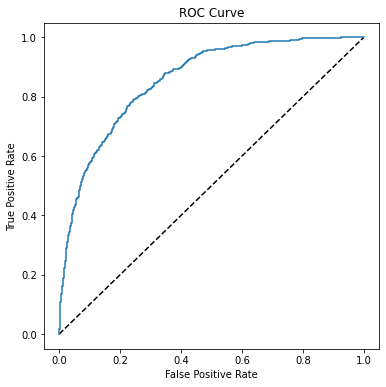

In [29]:
#Visualize the ROC
fpr, tpr , threshold = roc_curve(y_test, y_score[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [30]:
#print AUC
auc = roc_auc_score(y_test, y_score[:,1])
print('AUC:', auc)

AUC: 0.857526721386438


### Scalling
Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that 
disproportionately affect the predictions.
Encoding categorical variables. For example, by using a one hot encoding technique you can create individual binary (true/false) features for 
each possible category value.
To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named pipelines. 
These enable us to define a set of preprocessing steps that end with an algorithm. 
You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. 
This is useful, because when we want to use the model to predict values from new data,
 we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

In [31]:
print(list(df))

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
num_fea = [0,1,2,3,4,5,6]
# Define preprocessing for categorical features (encode the Age column)
cat_fea = [7]

['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age', 'Diabetic']


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
numeric_trans4 = Pipeline(
steps =[
    ('scaler',StandardScaler())
])
    
cat_trans4 = Pipeline(
steps = [
    ('onehot', OneHotEncoder(handle_unknown= 'ignore'))
]
)

In [33]:
# Combine preprocessing steps
from sklearn.compose import ColumnTransformer
processor = ColumnTransformer(transformers = [
    ('num', numeric_trans4,num_fea),
    ('cat',  cat_trans4, cat_fea,)
])

In [34]:
## Create preprocessing and training pipeline
pipeline = Pipeline(steps = [
    ('processor', processor),
    ('logregressor', LogisticRegression(C=1/reg, solver = 'liblinear'))
])

In [35]:
# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train,(y_train))
print(model)
prediction = model.predict(X_test)

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


In [36]:
#print predictions
print('Predictions', prediction[:20])
print('Actual     ', y_test[:20])

Predictions [1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1]
Actual      [0 1 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 1 0 1]


In [37]:
#check accuracy
ac = accuracy_score( y_test,prediction)
print(ac)

0.8456666666666667


In [38]:
#check confusion matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[1836  201]
 [ 262  701]]


In [39]:
#check the classification report
cr = classification_report(y_test,prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      2037
           1       0.78      0.73      0.75       963

    accuracy                           0.85      3000
   macro avg       0.83      0.81      0.82      3000
weighted avg       0.84      0.85      0.84      3000



In [40]:
y_score = model.predict_proba(X_test)
print(y_score)

[[2.84043865e-01 7.15956135e-01]
 [1.19938900e-01 8.80061100e-01]
 [7.46611962e-01 2.53388038e-01]
 ...
 [6.37677626e-01 3.62322374e-01]
 [9.99926309e-01 7.36908074e-05]
 [2.27234175e-01 7.72765825e-01]]


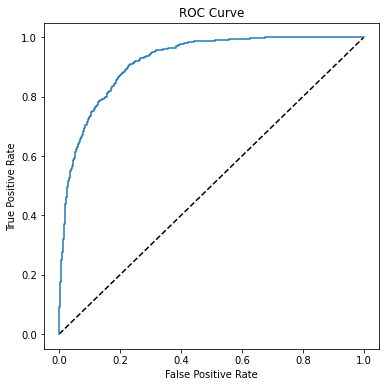

In [41]:
fpr, tpr , threshold = roc_curve(y_test, y_score[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

### RANDOM FOREST ALGORITHM
We can see the our matrics when Logistic regression was used. Now we will be using RandomForest to see if it will perform better
than Logistic Regression

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('processor', processor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

#Let's look at the performance metrics for the new model.


predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

Pipeline(steps=[('processor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])
Confusion Matrix:
 [[1968   69]
 [ 120  843]] 

Accuracy: 0.937
Overall Precision: 0.9243421052631579
Overall Recall: 0.8753894080996885

AUC: 0.9837530605909063


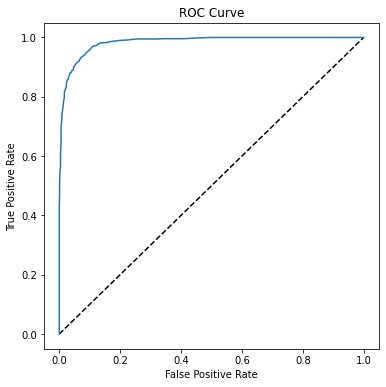

In [44]:
fpr, tpr , threshold = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

We can see that Random Forest perform better than the Logistic Regression in terms of all the metrics used, other algorithm can be used to checkmate 
the two that was use for better performance evaluatuion

In [45]:
#save and load the model
import joblib
filename = 'Diabetics.pkl'
joblib.dump(model, filename)
model = joblib.load(filename)

In [46]:
#create a new data
X_new = np.array([[1,85,59,27,35,42.604536,0.549542,22],
                 [7,115,47,52,35,41.511523,0.079019,23],
                 [9,103,78,25,304,29.582192,1.282870,43],
                 [8,80,95,33,24,26.624929,0.443947,53],
                 [1,156,53,15,226,29.786192,0.203824,41],
                  [8,117,39,32,164,21.230996,0.089363,25]
                 ])
print ('New sample: {}'.format(list(X_new[:5])))

New sample: [array([ 1.      , 85.      , 59.      , 27.      , 35.      , 42.604536,
        0.549542, 22.      ]), array([7.0000000e+00, 1.1500000e+02, 4.7000000e+01, 5.2000000e+01,
       3.5000000e+01, 4.1511523e+01, 7.9019000e-02, 2.3000000e+01]), array([  9.      , 103.      ,  78.      ,  25.      , 304.      ,
        29.582192,   1.28287 ,  43.      ]), array([ 8.      , 80.      , 95.      , 33.      , 24.      , 26.624929,
        0.443947, 53.      ]), array([1.0000000e+00, 1.5600000e+02, 5.3000000e+01, 1.5000000e+01,
       2.2600000e+02, 2.9786192e+01, 2.0382400e-01, 4.1000000e+01])]


In [47]:
#we can now check our new prediction base on input data
pred = model.predict(X_new)
print(pred)

[0 0 1 0 0 0]


### Summary
You can see how i model algorithm to predict possiblies of a patient having and not daibetes using two different Algorithm, 
and performance of the algorithms before and after introducing scalling. 
In conclusion, it is good to always apply scalling, several algorithm can be use as well that perform better that the ones used 
in the project.